In [5]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

## Loading all Tables

In [3]:
from utils.load_dataset import load_all_tables
load_all_tables(path=r"D:\NEU\Năm 3\DATA PREP\PROJECT_DATAPREP\GITHUB REPO\dataset\dseb63_final_project_DP_dataset\\", progress=True)

Loading all the tables...

Loaded 1 table
Loaded 2 tables
Loaded 3 tables
Loaded 4 tables
Loaded 5 tables
Loaded 6 tables
Loaded 7 tables
Loaded 8 tables

Complete loaded 8 tables.
---------------------------------------------
Dataset loaded time = 0:00:54.278044


## 1. EDA - application_train.csv

### 1.1 Snapshot of application dataset

**Snapshot of application train**

In [6]:
# Set the maximum number of rows and columns to display to unlimited
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

path = r"D:\NEU\Năm 3\DATA PREP\PROJECT_DATAPREP\GITHUB REPO\dataset\dseb63_final_project_DP_dataset\\"

In [8]:
application_train = pd.read_csv(path + 'dseb63_application_train.csv')
application_train = application_train.drop(columns='Unnamed: 0')
print('Number of data points : ', application_train.shape[0])
print('Number of features : ', application_train.shape[1])
application_train.head()

Number of data points :  246009
Number of features :  122


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,

**Snapshot of application test**

In [9]:
application_test = pd.read_csv(path + 'dseb63_application_test.csv')
application_test = application_test.drop(columns='Unnamed: 0')
print('Number of data points : ', application_test.shape[0])
print('Number of features : ', application_test.shape[1])
application_test.head()

Number of data points :  61502
Number of features :  121


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009630,-13297,-762,-637.0,-4307,19.0,1,1,0,1,0,0,Sales staff,4.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.675878,0.604894,0.000527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,83659
1,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006852,-14778,-1141,-1610.0,-4546,11.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.430827,0.425351,0.712155,0.0753,0.0568,0.9970,0.9592,0.1326,0.08,0.0517,0.4167,0.2917,0.0735,0.0601,0.0844,0.0058,0.1118,0.0756,0.0566,0.9940,0.9216,0.0523,0.0806,0.0345,0.3333,0.0417,0.0445,0.0652,0.0857,0.0,0.0000,0.0760,0.0568,0.9970,0.9597,0.1335,0.08,0.0517,0.4167,0.2917,0.0748,0.0611,0.0859,0.0058,0.1142,reg oper account,block of flats,0.0754,Monolithic,No,2.0,0.0,2.0,0.0,-1071.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,174814
2,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-17907,-639,-2507.0,-1461,4.0,1,1,1,1,0,0,Sales staff,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.527239,0.531760,0.207964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,-1435.0,0,1,0,0,0,0,0,0,0,0,0,0,0

**Percentage of test/train**

In [17]:
print('Ratio of test size and train size: {:.2f}'.format(len(application_test) / len(application_train) * 100))

Ratio of test size and train size: 25.00


In [6]:
print('Data types : \n')

application_train.info(verbose = True)

Data types : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246009 entries, 0 to 246008
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 i

In [7]:
application_train.shape

(246009, 122)

**Observation and Conclusion**

- There are total 246,009 rows which represents the infomation of loans and there are 122 variales

- The *target** variable defines if the client had payment difficulties meaning this person had late payment more than X days on at least one of the first Y installments of the load. Such case is marked as 1 while all other cases marked as 0.

### 

**Check number of duplicated rows in application_train**

In [8]:
application_train.duplicated(subset=['SK_ID_CURR']).sum()

0

> No loan applicant is duplicated

### 1.2 Examining missing values in application_train

In [9]:
def check_missing_values(df):
    # Missing value percentage 
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending=False).reset_index()
    df_null_percentage.columns = ["Feature", "Null Percentage"]
    
    return df_null_percentage

In [10]:
application_train_mis_values = check_missing_values(application_train)
application_train_mis_values

,Feature,Null Percentage
0,COMMONAREA_MEDI,69.887687
1,COMMONAREA_AVG,69.887687
2,COMMONAREA_MODE,69.887687
3,NONLIVINGAPARTMENTS_MEDI,69.456402
4,NONLIVINGAPARTMENTS_MODE,69.456402
5,NONLIVINGAPARTMENTS_AVG,69.456402
6,FONDKAPREMONT_MODE,68.406847
7,LIVINGAPARTMENTS_MODE,68.370263
8,LIVINGAPARTMENTS_MEDI,68.370263
9,LIVINGAPARTMENTS_AVG,68.370263


<AxesSubplot:xlabel='Null Percentage', ylabel='Feature'>

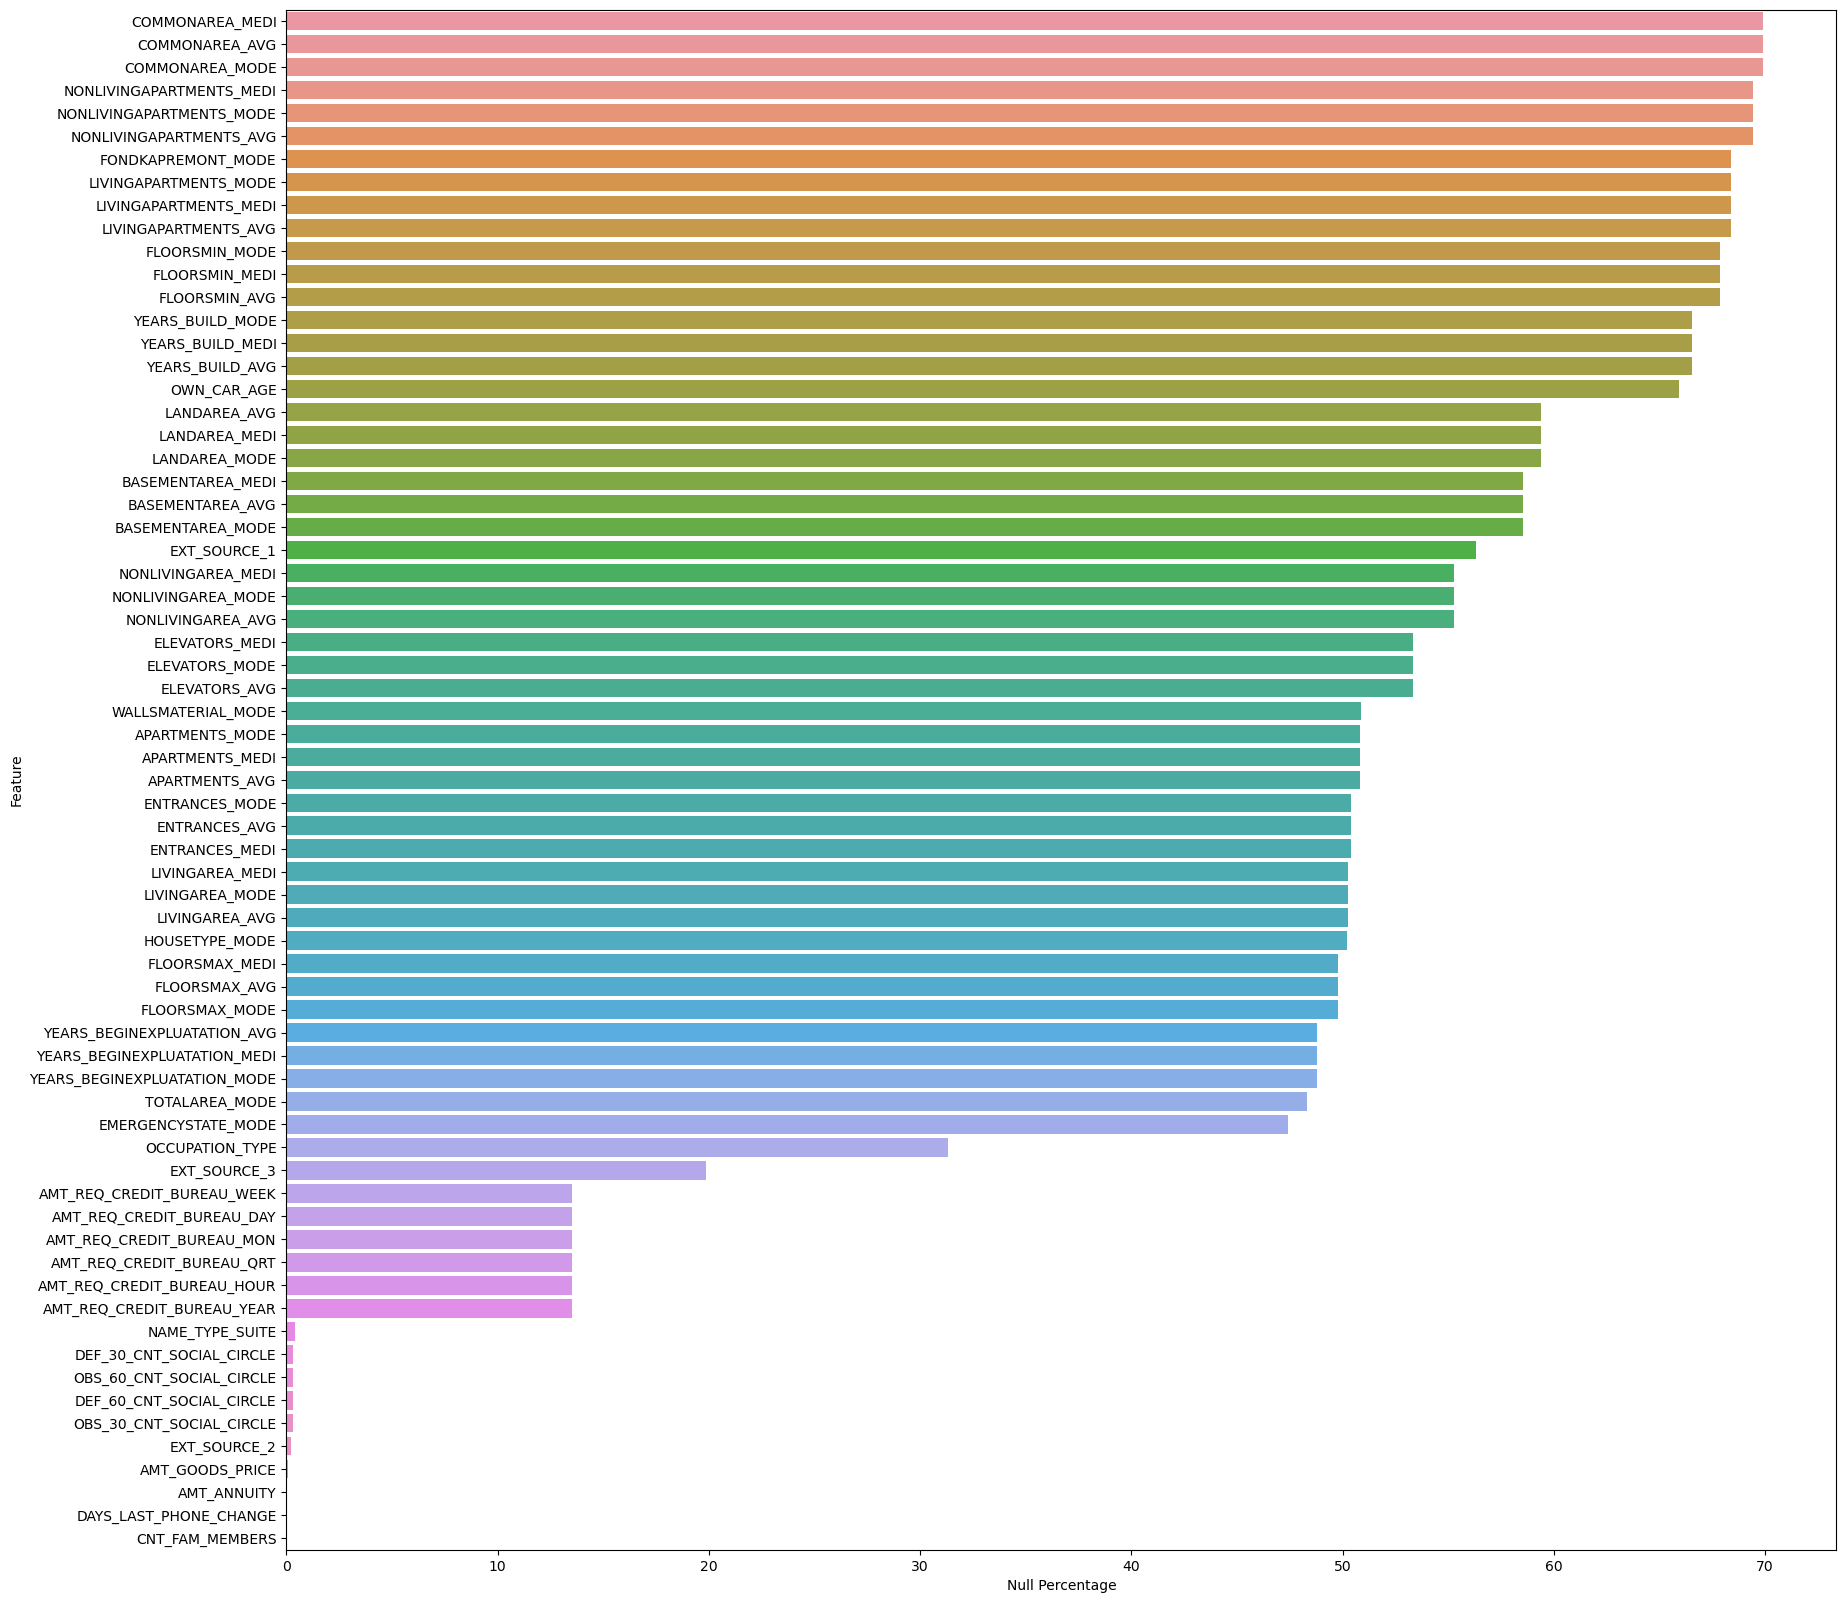

In [11]:
plt.figure(figsize=(20, 20))
sns.barplot(x = 'Null Percentage',y ='Feature', data= application_train_mis_values)

**Observation and Conclusion**

- It can be seen from the above plot that there are 67 columns out of 122 features which contain NaN values. If there were just one or two columns which had NaN values, we could have gotten away with just eliminating those columns, but for such large number of columns, we cannot remove them as is, as loss of information could be very high.

- We see that some columns like relating to "COMMONAREA", "NONLIVINGAPARTMENT", etc. have close to 70% missing values. We would have to come up with techniques to handle these many missing values and see what would work best for our data.

- Another thing to note here is that most of the columns which have more than 50% missing values are related to the Apartments Statistics of the borrower. It is very likely that these values were not recorded during data entry, and could be optional.

> **For Feature Selection, feature >= 90% null will be dropped**

### 1.3 Checking Data Types of columns

In [12]:
# Count number of each datatype in application_train
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

### 1.4 Distribution of TARGET Features

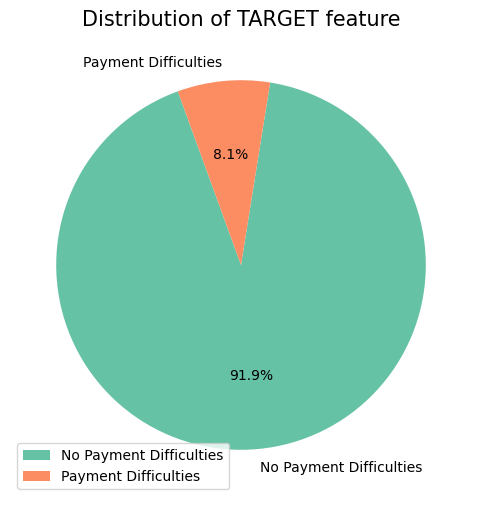

In [13]:
from utils.eda import explore_data as explore
explore.plot_categorical_pie(application_train['TARGET'], labels = ['No Payment Difficulties', 'Payment Difficulties'], title='Distribution of TARGET feature')

> From the distribution of Target variable, one thing that we can quickly notice is the Data Imbalance. There are only 8.07% of the total loans that had actually been Defaulted. This means that Defaulters is the minority class.

> On the other hand, there are 91.9% loans which were not Defaulted. Thus, Non-Defaulters will be our majority class.

## 1.5 Correlation Analysis

In [18]:
numeric_cols = application_train._get_numeric_data().columns
numeric_cols

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'SK_ID_CURR'],
      dtype='object', length=106)

In [19]:
numeric_cols = numeric_cols.drop('SK_ID_CURR')
numeric_df = application_train[numeric_cols]
numeric_corr_df = numeric_df.corr()
numeric_corr_df.style.background_gradient(cmap='PuBu').set_precision(2)

C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_16200\4196303797.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  numeric_corr_df.style.background_gradient(cmap='PuBu').set_precision(2)


In [29]:
top_target_corr = numeric_corr_df.iloc[1:,0].sort_values(ascending = False)

print('-'*50)
print('Most Positive Correlations:\n', top_target_corr.head(10))

print('-'*50)
print('\nMost Negative Correlations:\n', top_target_corr.tail(10)[::-1])

--------------------------------------------------
Most Positive Correlations:
 DAYS_BIRTH                     0.077633
REGION_RATING_CLIENT_W_CITY    0.060598
REGION_RATING_CLIENT           0.058058
DAYS_LAST_PHONE_CHANGE         0.053825
DAYS_ID_PUBLISH                0.052217
REG_CITY_NOT_WORK_CITY         0.051018
FLAG_EMP_PHONE                 0.045672
FLAG_DOCUMENT_3                0.044547
REG_CITY_NOT_LIVE_CITY         0.044483
DAYS_REGISTRATION              0.041713
Name: TARGET, dtype: float64
--------------------------------------------------

Most Negative Correlations:
 EXT_SOURCE_3                 -0.180096
EXT_SOURCE_2                 -0.158824
EXT_SOURCE_1                 -0.154135
DAYS_EMPLOYED                -0.044639
FLOORSMAX_AVG                -0.044281
FLOORSMAX_MEDI               -0.043838
FLOORSMAX_MODE               -0.043344
AMT_GOODS_PRICE              -0.040660
REGION_POPULATION_RELATIVE   -0.036908
ELEVATORS_AVG                -0.034360
Name: TARGET, dtype:

**Ba cột EXT_SOURCE có corelation lớn với target ---> cần được đưa vào model** 

### 1.5 Bivariate: Categorical Features Vs Target

> **Gender, Contract Type, Car Ownership Status, and Reality Ownership Status**

**Gender vs Target**

In [ ]:
gender_target = application_train.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()

print('-'*50)
print('Clients Repayment Abilities By Gender')

gender_target.sort_values(by='SK_ID_CURR',ascending=False)

--------------------------------------------------
Clients Repayment Abilities By Gender


,CODE_GENDER,TARGET,SK_ID_CURR
0,F,0,150522
2,M,0,75608
1,F,1,11334
3,M,1,8542
4,XNA,0,3


--------------------------------------------------
Percentage of Credit Defaulters By Gender


Text(0.5, 1.0, 'Percentage of Defaulters by Gender\n')

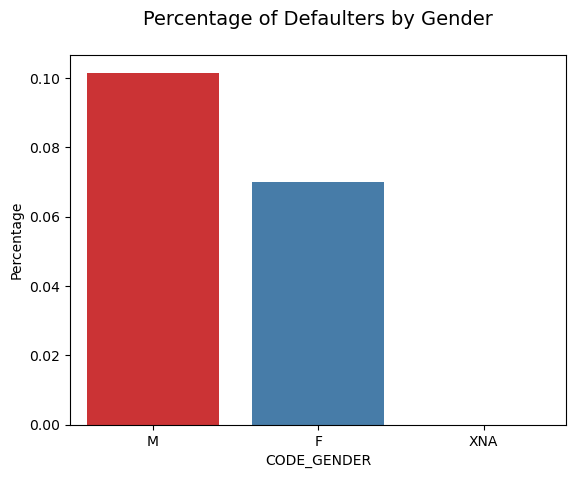

In [34]:
print('-'*50)
print('Percentage of Credit Defaulters By Gender')
gender_percentage = application_train[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'], as_index=False).mean().sort_values(by='TARGET',ascending=False)
sns.barplot(x='CODE_GENDER', y='TARGET',
            data=gender_percentage, palette='Set1')

plt.ylabel('Percentage')
plt.title('Percentage of Defaulters by Gender\n',
           fontsize=14)

**Observation and Conclusion**

- It can be seen that women have applied for a larger majority of loans. In total, there are about 202,448 loan applications applied by women, and about 105,059 applications applied by men.

- However, a larger percentage (about 10% of the total) of men had the problems repaying the loan compared to women clients (about 7%).

**Contract type vs Target**

<AxesSubplot:title={'center':'\nClients Repayment Abilities By Realty Ownership Status\n'}, xlabel='FLAG_OWN_REALTY', ylabel='count'>

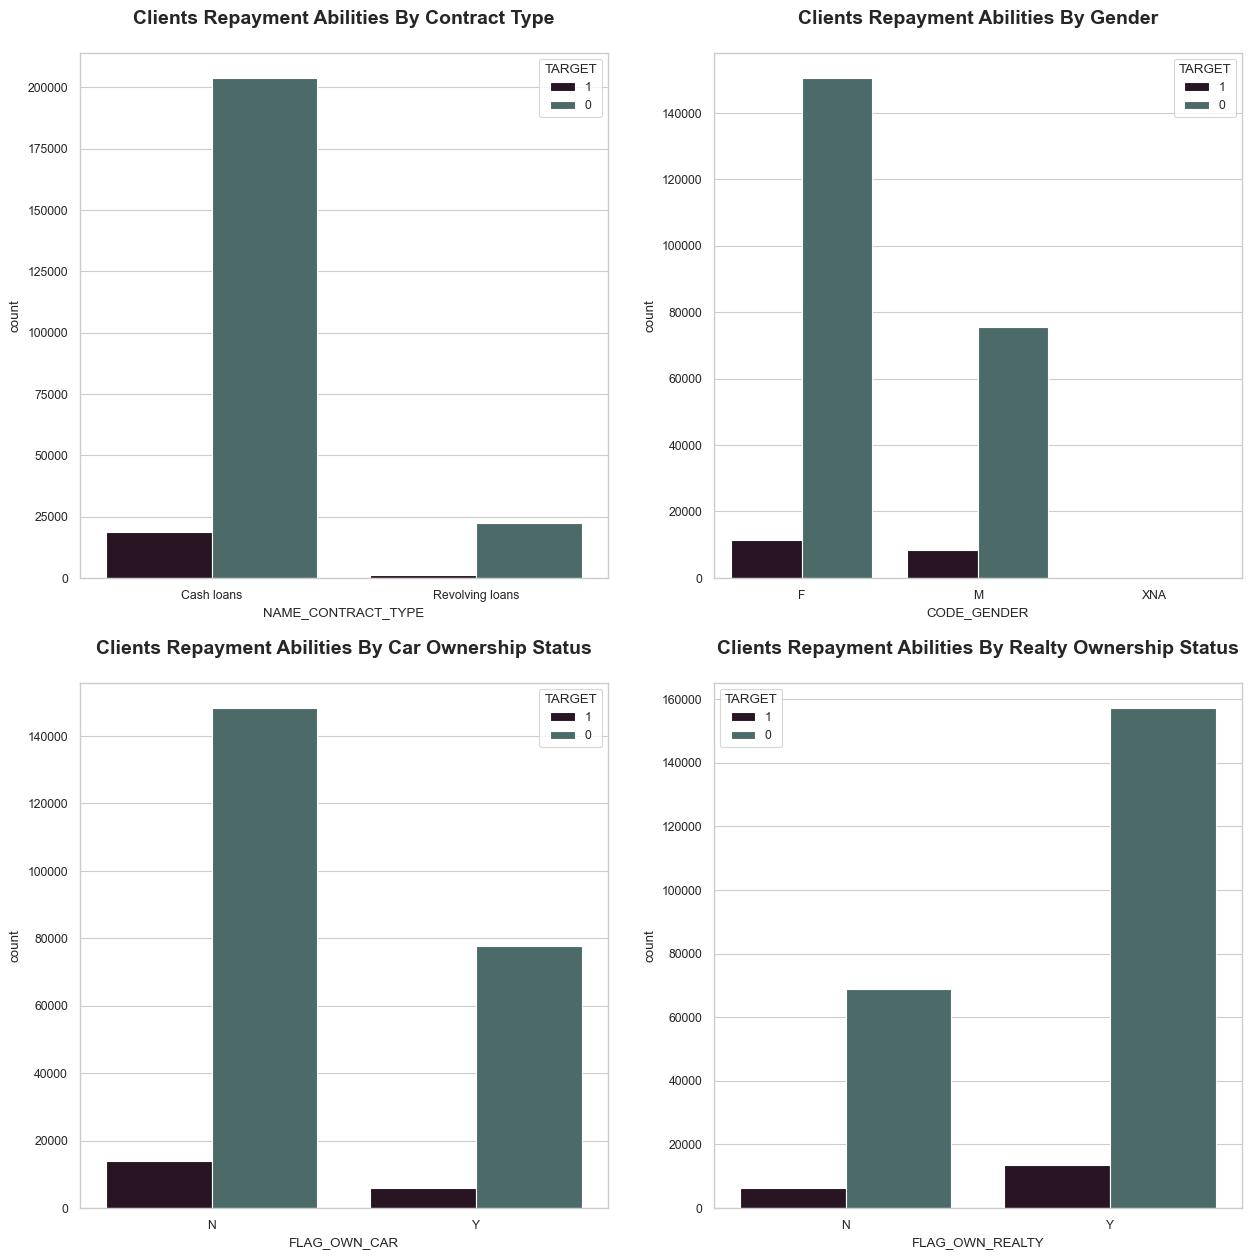

In [ ]:
# visualization pt 1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
sns.set_context('paper', font_scale=1)

palette = ["#2B1125", "#466F6D"]

ax[0][0].set_title('Clients Repayment Abilities By Contract Type\n',
                   fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data=application_train, hue='TARGET',
              palette=palette, ax=ax[0][0],hue_order= [1,0])

ax[0][1].set_title('Clients Repayment Abilities By Gender\n',
                   fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data=application_train, hue='TARGET',
              palette=palette, ax=ax[0][1], hue_order=[1, 0])

ax[1][0].set_title('\nClients Repayment Abilities By Car Ownership Status\n',
                   fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data=application_train, hue='TARGET',
              palette=palette, ax=ax[1][0], hue_order=[1, 0])

ax[1][1].set_title('\nClients Repayment Abilities By Realty Ownership Status\n',
                   fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data=application_train, hue='TARGET',
              palette=palette, ax=ax[1][1], hue_order= [1,0])

In [ ]:
contract_type = application_train.groupby(by = ['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()

print('-'*50)
print('Clients Repayment Abilites by Contract Type')
contract_type.sort_values(by='SK_ID_CURR', ascending=False)

--------------------------------------------------
Clients Repayment Abilites by Contract Type


,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,0,203890
2,Revolving loans,0,22243
1,Cash loans,1,18601
3,Revolving loans,1,1275


> **Cash loans** with around 278K loans accounted for the majority of total loans in this dataset. **Revolving loans** have a much lower amount of around 29K compared to cash loans.

**Car Ownership Status vs Target**

In [ ]:
car_ownership = application_train.groupby(by=['FLAG_OWN_CAR','TARGET'],as_index=False)['SK_ID_CURR'].count()

print('-'*50)
print('Cilents Repayment Abilities By Car Ownership Status')
car_ownership.sort_values(by='FLAG_OWN_CAR')

--------------------------------------------------
Cilents Repayment Abilities By Car Ownership Status


,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,N,0,148344
1,N,1,13840
2,Y,0,77789
3,Y,1,6036


Text(0.5, 1.0, 'Percentage of Defaulters by Car Ownership status\n')

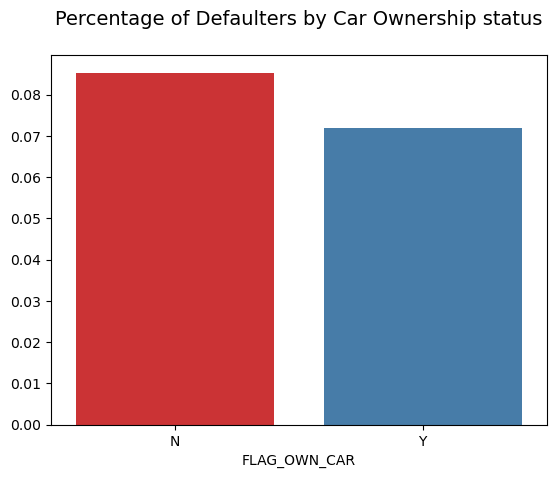

In [41]:
car_percentage = application_train[['FLAG_OWN_CAR','TARGET']].groupby('FLAG_OWN_CAR', as_index=False).mean()
sns.barplot(x='FLAG_OWN_CAR', y='TARGET',
            data=car_percentage, palette='Set1')

plt.ylabel('')
plt.title('Percentage of Defaulters by Car Ownership status\n',
          fontsize=14)

**Most of the clients do not own a car.**

Clients who **own a car (about 8%) had the problems in repaying the loan** compared to clients who not own a car (about 7%). However, the difference is not very significant.

**Realty Ownership Status vs Target**

In [ ]:
realty_ownership = application_train.groupby(by=['FLAG_OWN_REALTY','TARGET'],as_index=False)['SK_ID_CURR'].count()

print('-'*50)
print('Clients Repayment Abilities By Realty Ownership Status')
realty_ownership.sort_values(by='FLAG_OWN_REALTY')

--------------------------------------------------
Clients Repayment Abilities By Realty Ownership Status


,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
0,N,0,68878
1,N,1,6288
2,Y,0,157255
3,Y,1,13588


Text(0.5, 1.0, 'Percentage of Defaulters by Realty Ownership status\n')

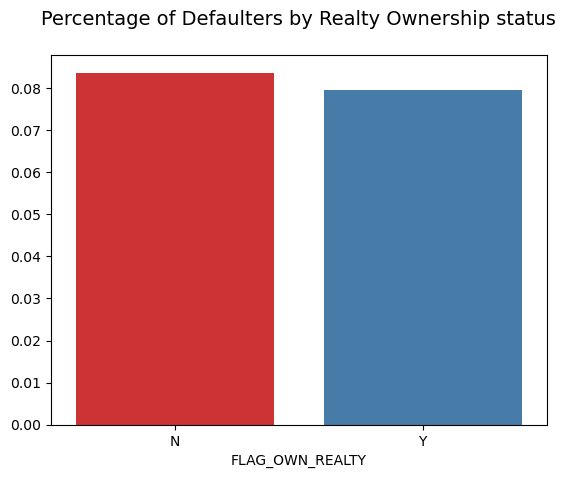

In [42]:
sns.barplot(x='FLAG_OWN_REALTY', y='TARGET',
            data=application_train[['FLAG_OWN_REALTY', 'TARGET']].groupby(by='FLAG_OWN_REALTY', as_index=False).mean().sort_values(by='TARGET', ascending=False), palette='Set1')

plt.ylabel('')
plt.title('Percentage of Defaulters by Realty Ownership status\n',
          fontsize=14)

Most of the clients own a flat/house.


Clients who **own a house/flat** (about 8%) had the problems in repaying the loan compared to clients who not own a house/flat (about 7%). However, the difference is not very significant.

**Suite Type, Income Type, Education Type, and Family Status**

<AxesSubplot:title={'center':'\nClients Repayment Abilities By Family Status\n'}, xlabel='NAME_FAMILY_STATUS', ylabel='count'>

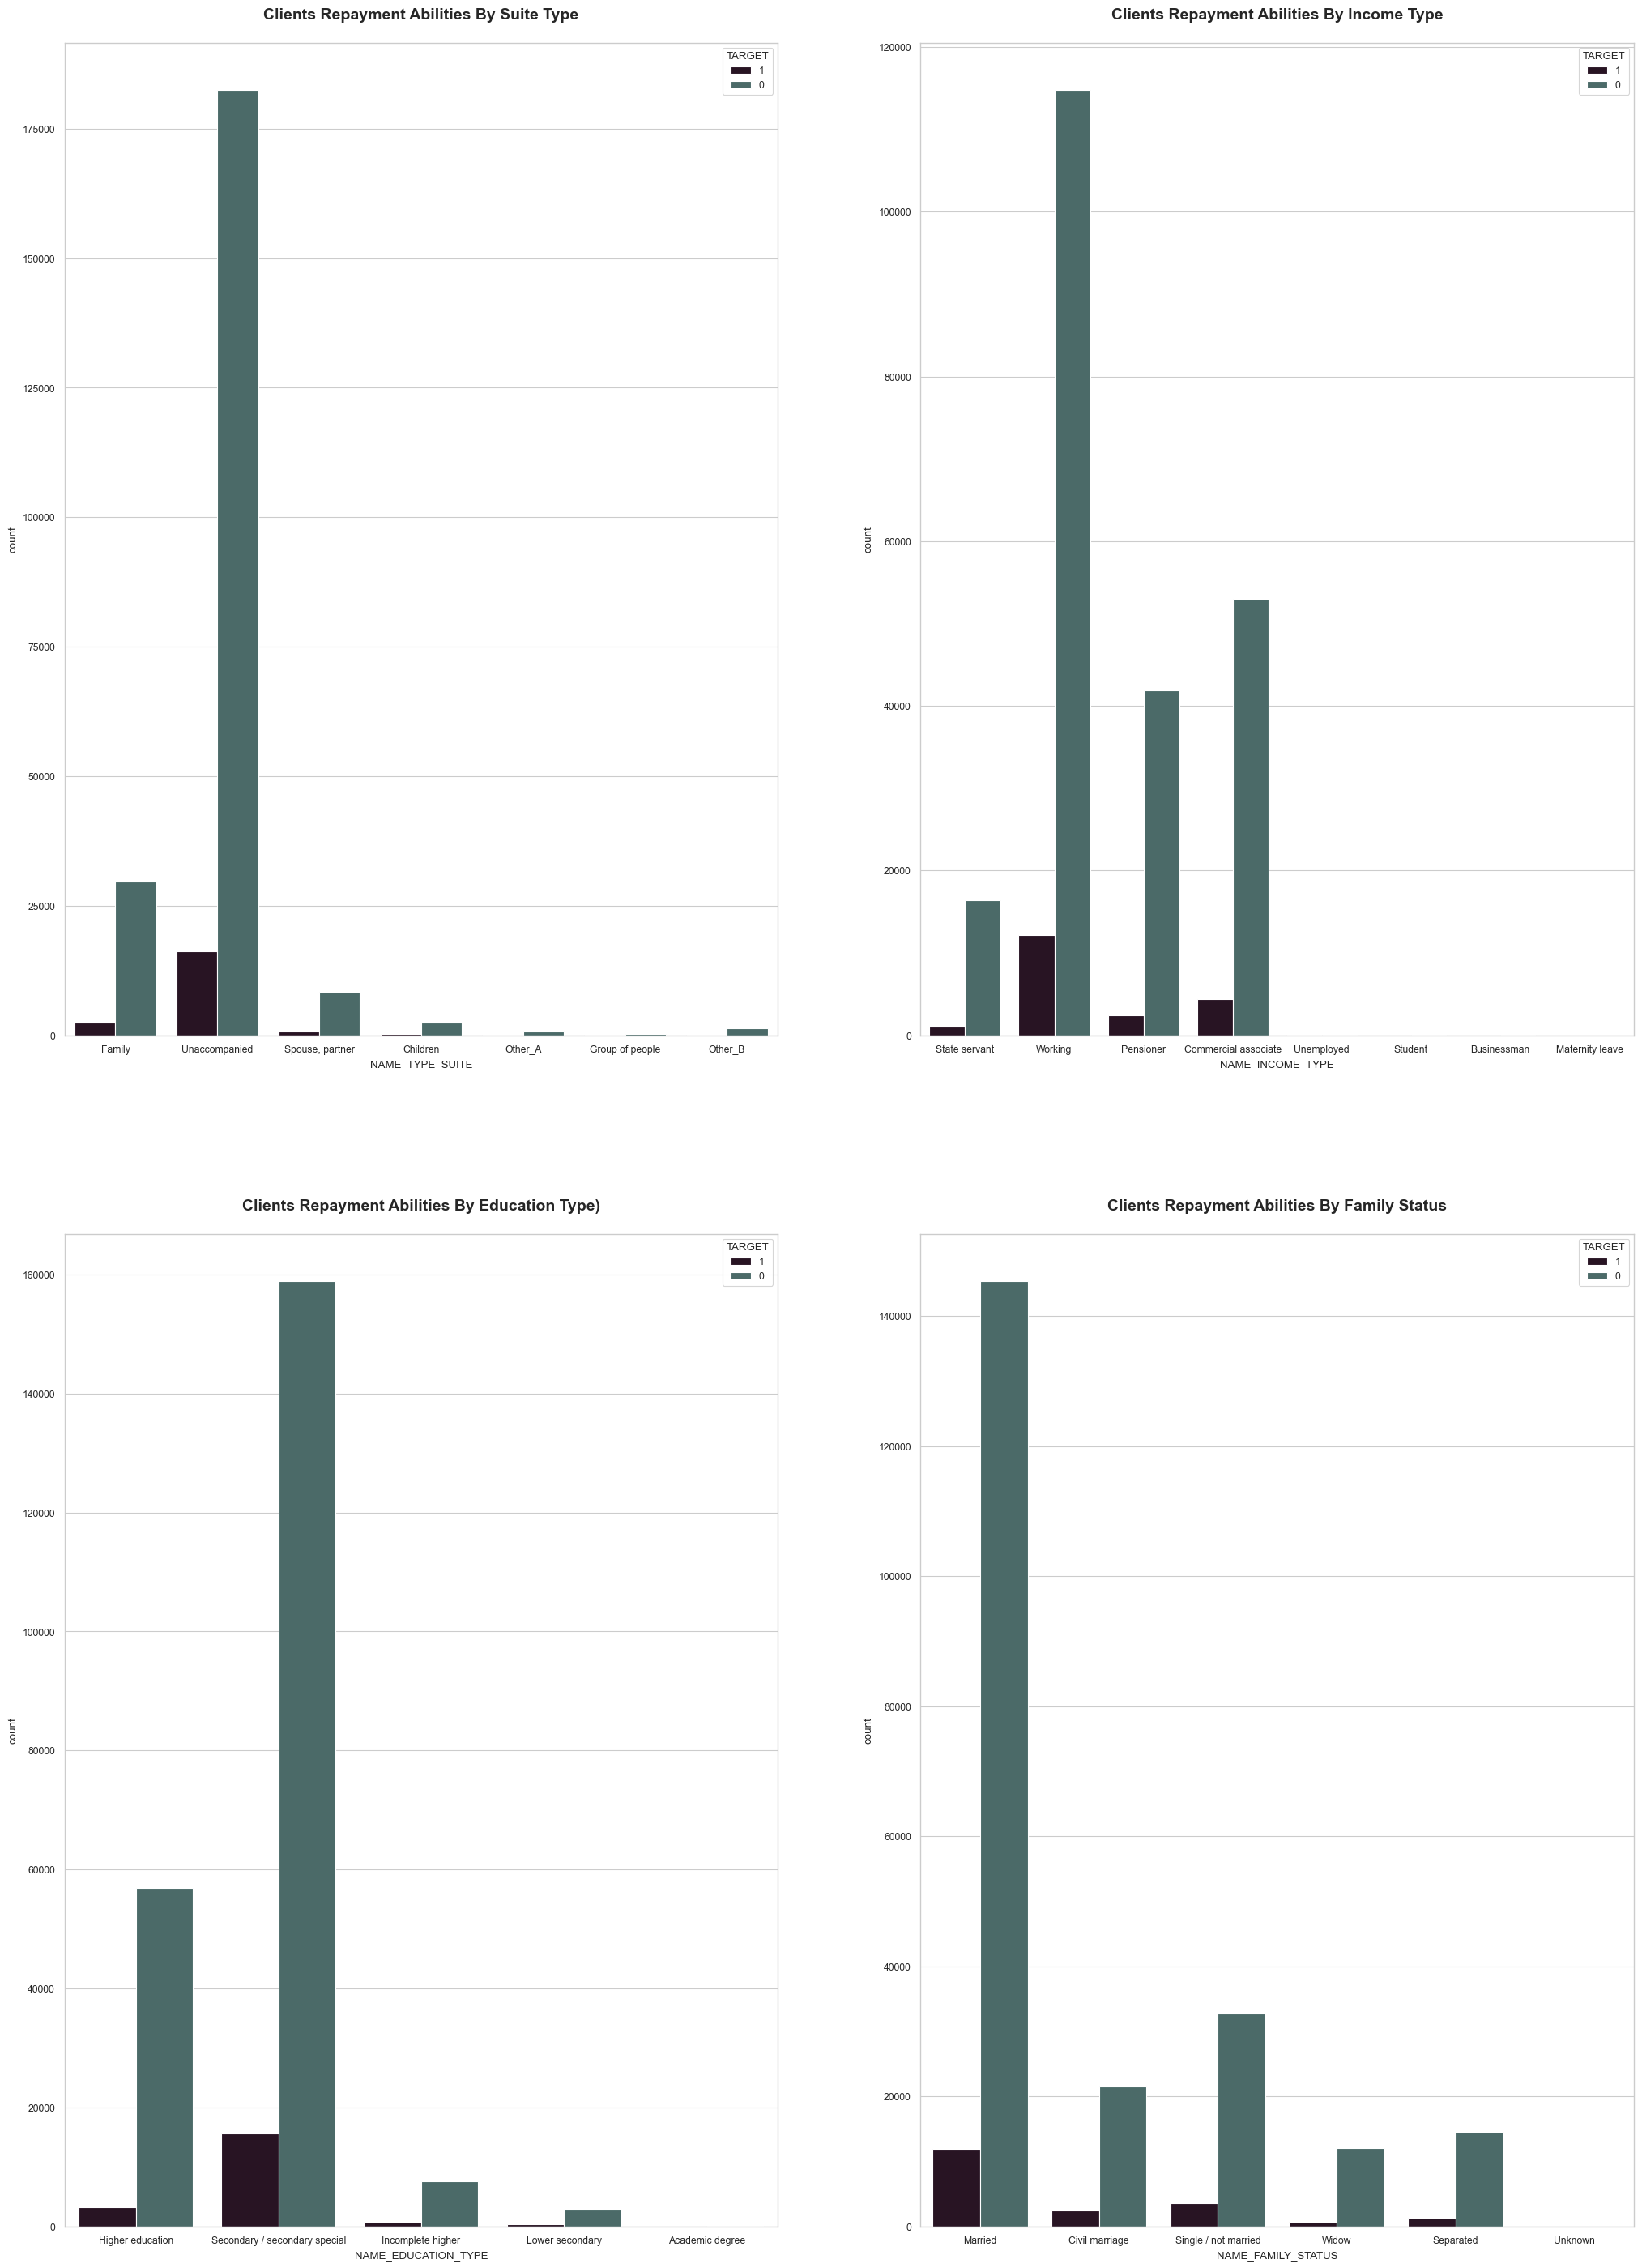

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(25, 35))
sns.set_context('paper', font_scale=1)


palette = ["#2B1125", "#466F6D"]
ax[0][0].set_title('Clients Repayment Abilities By Suite Type\n',
                   fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data=application_train, hue='TARGET',
              palette=palette, ax=ax[0][0], hue_order=[1, 0])

ax[0][1].set_title('Clients Repayment Abilities By Income Type\n',
                   fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data=application_train, hue='TARGET',
              palette=palette, ax=ax[0][1], hue_order=[1, 0])

ax[1][0].set_title('\nClients Repayment Abilities By Education Type)\n',
                   fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data=application_train, hue='TARGET',
              palette=palette, ax=ax[1][0], hue_order=[1, 0])

ax[1][1].set_title('\nClients Repayment Abilities By Family Status\n',
                   fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data=application_train, hue='TARGET',
              palette=palette, ax=ax[1][1], hue_order=[1, 0])

**Suite Type vs Target**

In [ ]:
suit_type = application_train.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()

print('-'*50)
print('Clients Repayment Abilities By Suite Type')
suit_type.sort_values(by='SK_ID_CURR', ascending=False)

--------------------------------------------------
Clients Repayment Abilities By Suite Type


,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
12,Unaccompanied,0,182507
2,Family,0,29706
13,Unaccompanied,1,16235
10,"Spouse, partner",0,8390
3,Family,1,2440
0,Children,0,2419
8,Other_B,0,1275
11,"Spouse, partner",1,719
6,Other_A,0,647
1,Children,1,202


Text(0.5, 1.0, 'Percentage of Defaulters by Suite Type\n')

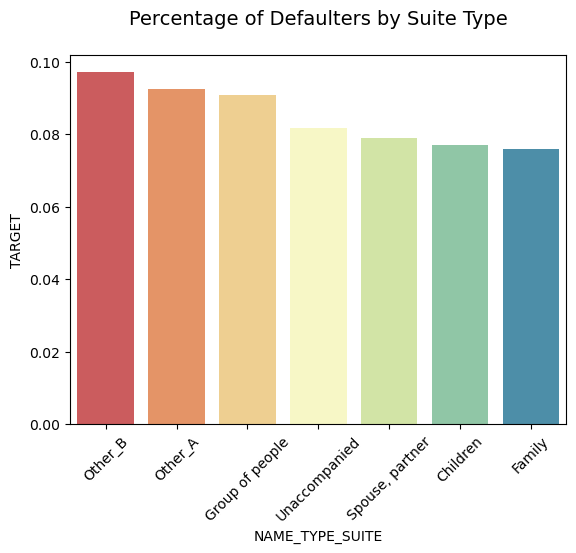

In [56]:
sns.barplot(x='NAME_TYPE_SUITE', y='TARGET',
            data=application_train[['NAME_TYPE_SUITE', 'TARGET']].groupby(['NAME_TYPE_SUITE'], as_index=False).mean().sort_values(by=['TARGET'], ascending=False), palette='Spectral')

plt.xticks(rotation=45)
plt.title('Percentage of Defaulters by Suite Type\n',
          fontsize=14)

> Clients who are accompanied by **other_b** when applying for a loan have a **higher percentage of having difficulty repaying the loan (about 10%)**

**Income Type vs Target**

In [ ]:
income_type = application_train.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()

print('-'*50)
print('Clients Repayment Abilities By Income Type')
income_type.sort_values(by='SK_ID_CURR', ascending=False)

--------------------------------------------------
Clients Repayment Abilities By Income Type


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
12,Working,0,114812
1,Commercial associate,0,53000
5,Pensioner,0,41916
7,State servant,0,16367
13,Working,1,12118
2,Commercial associate,1,4339
6,Pensioner,1,2398
8,State servant,1,1014
9,Student,0,15
10,Unemployed,0,13


Text(0.5, 1.0, 'Percentage of Defaulters by Income Type\n')

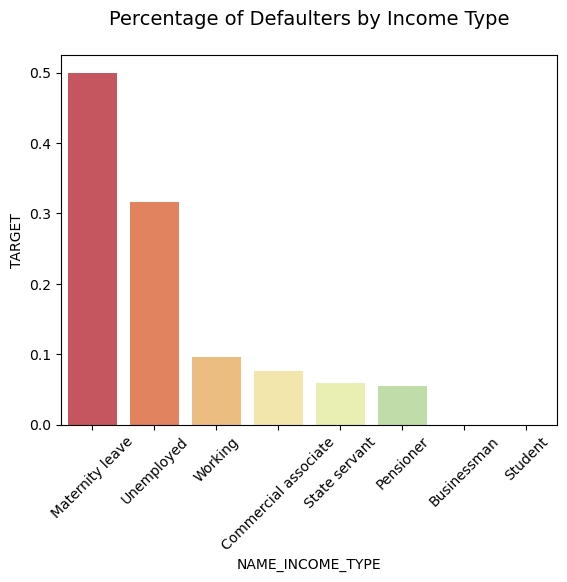

In [58]:
sns.barplot(x='NAME_INCOME_TYPE', y='TARGET',
            data=application_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).sort_values(by=['TARGET'], ascending=False), palette='Spectral')

plt.xticks(rotation=45)
plt.title('Percentage of Defaulters by Income Type\n',
          fontsize=14)

It can be seen that clients who have income type of working have applied for a larger majority of loans, there are about 158,774 loan applications.

Clients with the income type of **businessman and student have no difficulty in repaying their loans.**

While, clients with the income type of **maternity leaves and unemployed have the highest percentage (about 40% and 36%) of TARGET = 1, ie. having problem in repaying the loans.**

**Education Type vs Target**

In [ ]:
education_type = application_train.groupby(by=['NAME_EDUCATION_TYPE','TARGET'],as_index = False)['SK_ID_CURR'].count()

print('-'*50)
print('Clients Repayment Abilities By Education Type')
education_type.sort_values(by='SK_ID_CURR', ascending=False)

--------------------------------------------------
Clients Repayment Abilities By Education Type


,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
8,Secondary / secondary special,0,158936
2,Higher education,0,56818
9,Secondary / secondary special,1,15586
4,Incomplete higher,0,7505
3,Higher education,1,3243
6,Lower secondary,0,2747
5,Incomplete higher,1,706
7,Lower secondary,1,338
0,Academic degree,0,127
1,Academic degree,1,3


Text(0.5, 1.0, 'Percentage of Defaulters by Education Type\n')

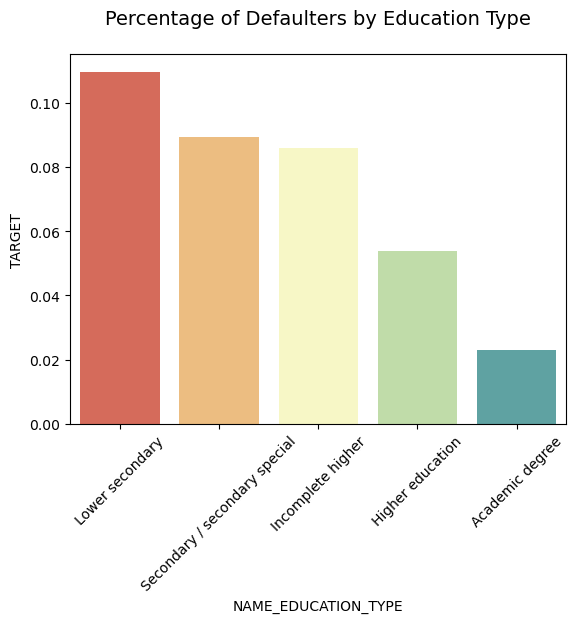

In [60]:
sns.barplot(x='NAME_EDUCATION_TYPE', y='TARGET',
            data=application_train[['NAME_EDUCATION_TYPE', 'TARGET']].groupby(['NAME_EDUCATION_TYPE'], as_index=False).mean().sort_values(by=['TARGET'], ascending=False), palette='Spectral')

plt.xticks(rotation=45)
plt.title('Percentage of Defaulters by Education Type\n',
          fontsize=14)

A large number of applications (218K) are filed by client having secondary education followed by people with higher education with 75K applications.

While, it can be seen that the clients with the education type of **lower secondary has the highest percentage** (around 10%) of TARGET = 1, ie. having problem in repaying the loans.

**Family Status Vs Target**

In [ ]:
family =  application_train.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()

print('-'*50)
print('Clients Repayment Abilities By Family Status')
family

--------------------------------------------------
Clients Repayment Abilities By Family Status


,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
0,Civil marriage,0,21470
1,Civil marriage,1,2372
2,Married,0,145407
3,Married,1,11913
4,Separated,0,14504
5,Separated,1,1301
6,Single / not married,0,32715
7,Single / not married,1,3556
8,Unknown,0,1
9,Widow,0,12036


Text(0.5, 1.0, 'Percentage of Defaulters by Family Status\n')

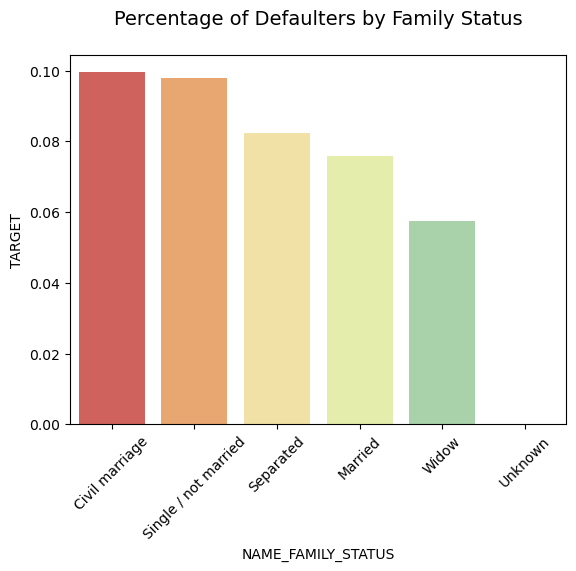

In [61]:
sns.barplot(x='NAME_FAMILY_STATUS', y='TARGET',
            data=application_train[['NAME_FAMILY_STATUS', 'TARGET']].groupby(['NAME_FAMILY_STATUS'], as_index=False).mean().sort_values(by=['TARGET'], ascending=False), palette='Spectral')

plt.xticks(rotation=45)
plt.title('Percentage of Defaulters by Family Status\n',
          fontsize=14)

Clients who are married have applied for a larger majority of loans, there are about 157,320 loan applications.

Clients with family status of **civil marriage** and **single** have the highest percentage (nearly 10%) of clients who have problem in repaying the loans.

**Housing Type, Occupation Type, Process Day, and Organization Type**

**Housing Type Vs Target**

In [ ]:
housing = application_train.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()

print('-' * 50)
print('Clients Repayment Abilities By Housing Type')
housing

--------------------------------------------------
Clients Repayment Abilities By Housing Type


,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
0,Co-op apartment,0,833
1,Co-op apartment,1,74
2,House / apartment,0,201317
3,House / apartment,1,17072
4,Municipal apartment,0,8124
5,Municipal apartment,1,742
6,Office apartment,0,1954
7,Office apartment,1,139
8,Rented apartment,0,3443
9,Rented apartment,1,473


Text(0.5, 1.0, 'Percentage of Defaulters by Housing Type\n')

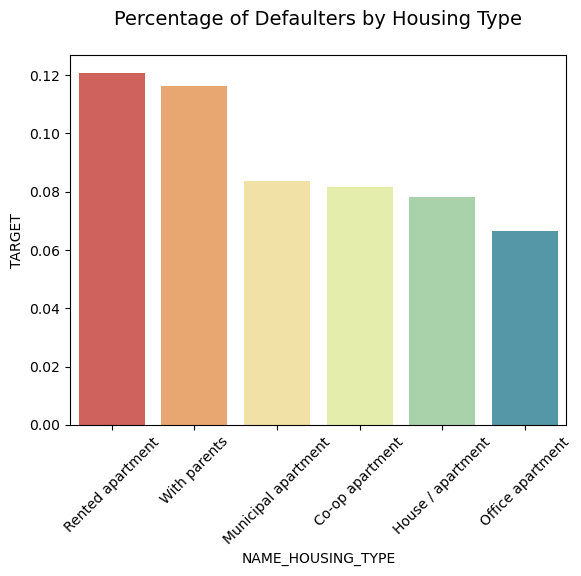

In [65]:
sns.barplot(x='NAME_HOUSING_TYPE', y='TARGET',
            data=application_train[['NAME_HOUSING_TYPE', 'TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'],ascending=False), palette='Spectral')

plt.xticks(rotation=45)
plt.title('Percentage of Defaulters by Housing Type\n',
          fontsize=14)

> Clients with housing type of **rented apartment** has the highest percentage (around 12%) in difficulty in repaying the loans.

Text(0.5, 0, '\nHousing Type')

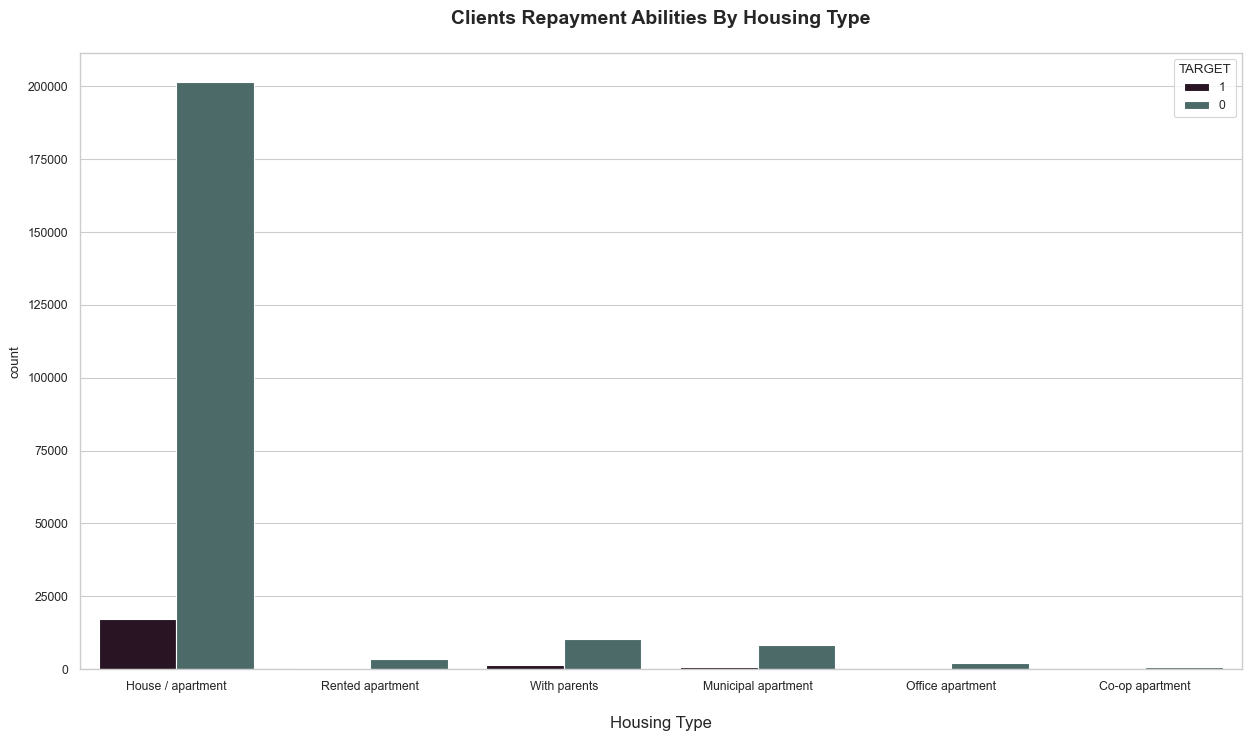

In [ ]:
# visualization
plt.figure(figsize=(15, 8))
fig = sns.countplot(x='NAME_HOUSING_TYPE', data=application_train,
                    hue='TARGET', palette=palette,hue_order=[1,0])
plt.title('Clients Repayment Abilities By Housing Type\n',weight='bold', fontsize=14)
plt.xlabel('\nHousing Type', fontsize=12)

Clients living in **House / apartments** has the highest number of loan apllications equal to 218K.

**Occupation Type Vs Target**

In [ ]:
occupation = application_train.groupby(by=['OCCUPATION_TYPE', 'TARGET'],as_index=False)['SK_ID_CURR'].count()

print('-'*50)
print('Clients Repayment Abilities By Occupation Type')
occupation

--------------------------------------------------
Clients Repayment Abilities By Occupation Type


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,0,7464
1,Accountants,1,384
2,Cleaning staff,0,3364
3,Cleaning staff,1,358
4,Cooking staff,0,4191
5,Cooking staff,1,497
6,Core staff,0,20631
7,Core staff,1,1411
8,Drivers,0,13227
9,Drivers,1,1659


Text(0.5, 1.0, 'Percentage of Defaulters by Occupation Type\n')

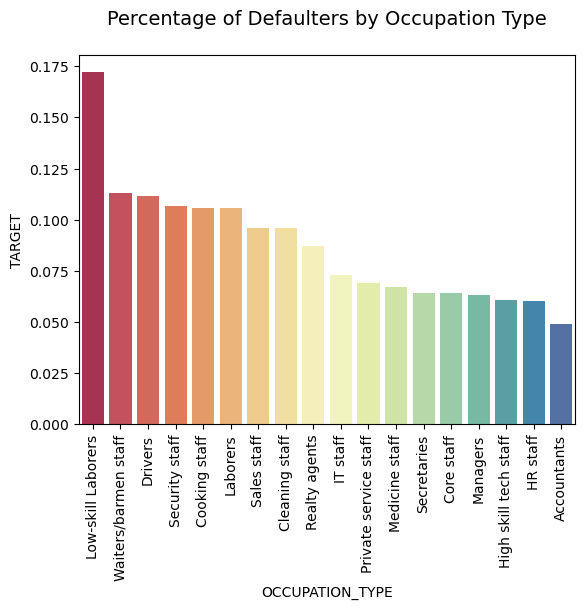

In [73]:
sns.barplot(x='OCCUPATION_TYPE', y='TARGET',
            data=application_train[['OCCUPATION_TYPE', 'TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by='TARGET',ascending = False), palette='Spectral')

plt.xticks(rotation=90)
plt.title('Percentage of Defaulters by Occupation Type\n',
          fontsize=14)

A large number of applications (45K) are filed by clients who work as Laborers.

It can be seen that the clients with occupation type of **Low-skill Laborers** has the highest percentage (around 17%) of TARGET = 1, ie. having problem in repaying the loans.

**Process Day Vs Target**

In [ ]:
process_d = application_train.groupby(by=['WEEKDAY_APPR_PROCESS_START', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

print('-'*50)
print('Clients Repayment Abilities By Process Day')
process_d

--------------------------------------------------
Clients Repayment Abilities By Process Day


,WEEKDAY_APPR_PROCESS_START,TARGET,SK_ID_CURR
0,FRIDAY,0,36915
1,FRIDAY,1,3306
2,MONDAY,0,37337
3,MONDAY,1,3168
4,SATURDAY,0,25046
5,SATURDAY,1,2127
6,SUNDAY,0,11848
7,SUNDAY,1,1010
8,THURSDAY,0,37294
9,THURSDAY,1,3295


In [ ]:
application_train[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean().sort_values(by='TARGET',ascending = False)

,WEEKDAY_APPR_PROCESS_START,TARGET
5,TUESDAY,0.083241
0,FRIDAY,0.082196
6,WEDNESDAY,0.081377
4,THURSDAY,0.081180
3,SUNDAY,0.078550
2,SATURDAY,0.078276
1,MONDAY,0.078213


Text(0.5, 0, '\nProcess Day')

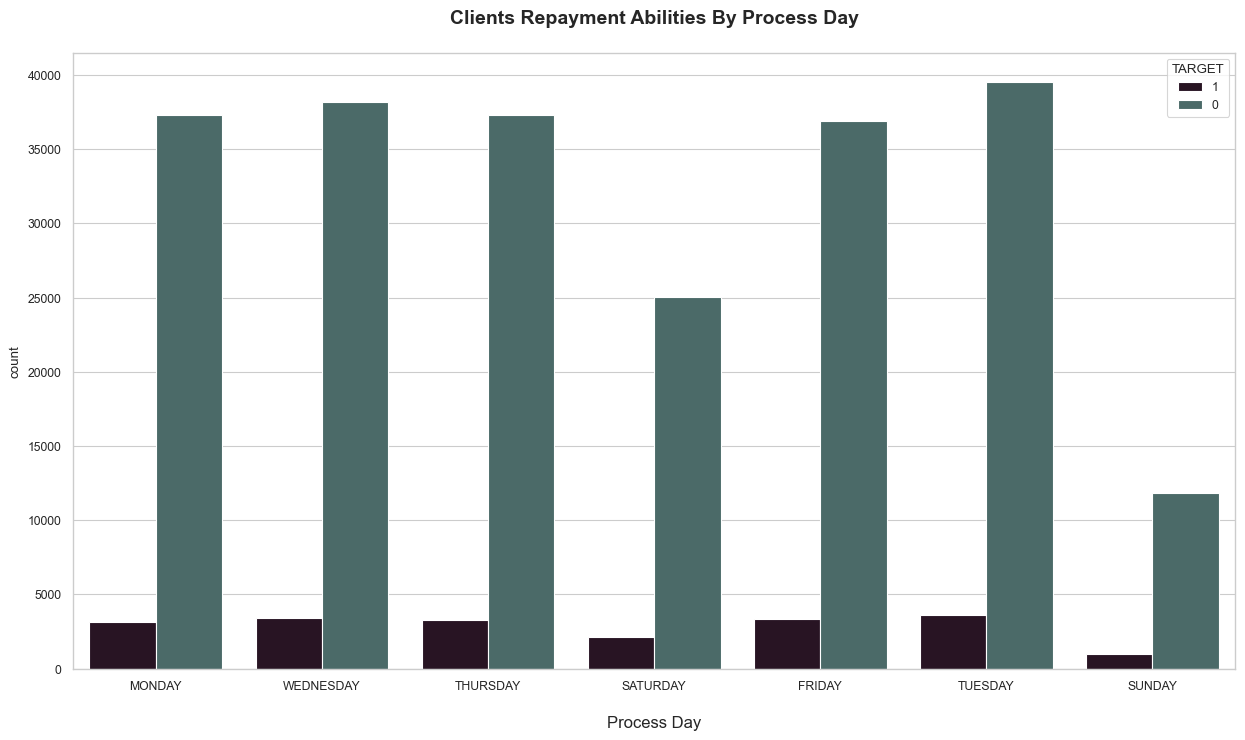

In [ ]:
# visualization
plt.figure(figsize=(15,8))
fig = sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data = application_train, hue = 'TARGET', palette = palette,hue_order=[1,0])
plt.title('Clients Repayment Abilities By Process Day\n', weight='bold', size=14)
plt.xlabel('\nProcess Day', fontsize=12)

Each application processing day has almost the same percentage (about 7% - 8%) in of TARGET = 1, ie. having problem in repaying the loans.

**Organization Type Vs Target**

In [ ]:
organization = application_train.groupby(by=['ORGANIZATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()

print('-'*50)
print('Clients Repayment Abilities By Suite Type')
organization

--------------------------------------------------
Clients Repayment Abilities By Suite Type


,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
0,Advertising,0,311
1,Advertising,1,28
2,Agriculture,0,1763
3,Agriculture,1,206
4,Bank,0,1878
5,Bank,1,104
6,Business Entity Type 1,0,4420
7,Business Entity Type 1,1,395
8,Business Entity Type 2,0,7739
9,Business Entity Type 2,1,738


Text(0.5, 1.0, 'Percentage of Defaulters by Organization Type\n')

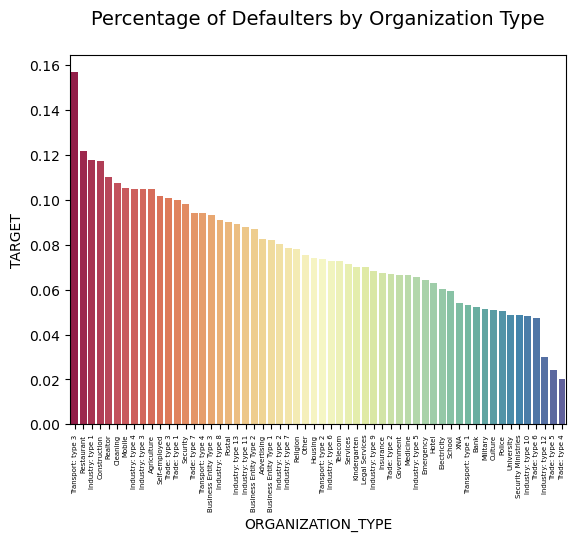

In [79]:
sns.barplot(x='ORGANIZATION_TYPE', y='TARGET',
            data=application_train[['ORGANIZATION_TYPE', 'TARGET']].groupby(['ORGANIZATION_TYPE'], as_index=False).mean().sort_values(by=['TARGET'], ascending=False), palette='Spectral')

plt.xticks(rotation=90,size = 5)
plt.title('Percentage of Defaulters by Organization Type\n',
          fontsize=14)

Clients with organization type of **transport: type 3** has the highest percentage (around 15%) of TARGET = 1, ie. having problem in repaying the loans.

### 1.6 Bivariate: Numerical Features Vs Target

**Amount Credit of the Loan Vs Target**

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


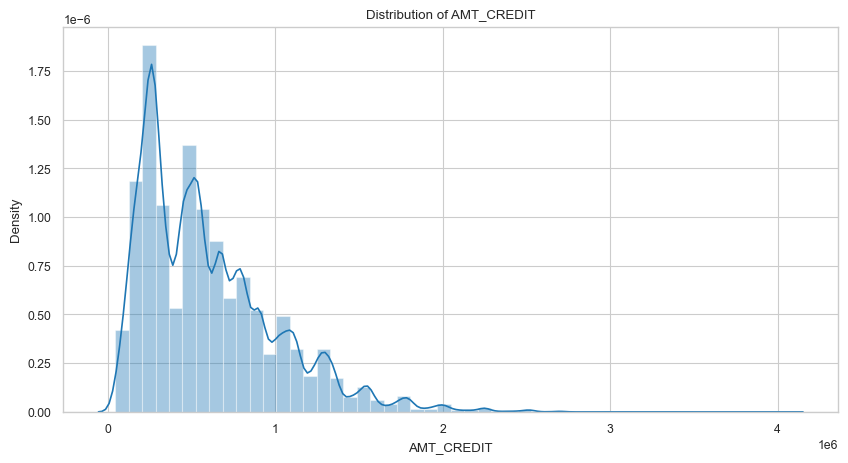

In [ ]:
# Check distribution of Amount Credit
import seaborn as sns  # for making plots with seaborn
color = sns.color_palette()

plt.figure(figsize=(10, 5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(application_train["AMT_CREDIT"])

C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_35936\3809460736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='AMT_CREDIT', data=application_train,


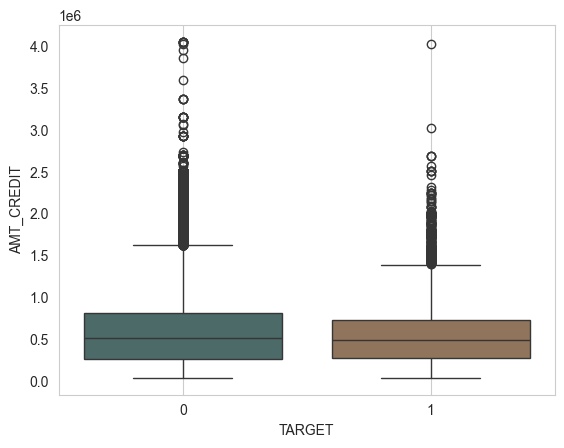

In [ ]:
palette = ["#466F6D", "#987554"]
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=application_train,
            palette=palette)
plt.grid()
plt.show()

Median value of the credit amount of the clients who have no payment difficulties is slightly larger than the median value of clients who have payment difficulties. It means, the clients with higher credit amount of the loan have a slightly higher chances of being capable of repaying the loan than clients with lower credit amount.

**Amount Income Vs Target**

- Distribution of Amount Income

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


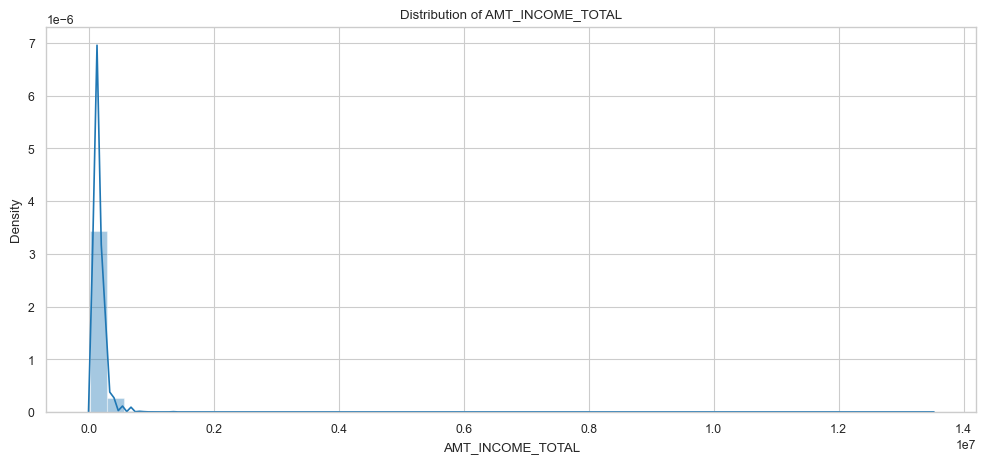

In [ ]:
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()

plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(application_train["AMT_INCOME_TOTAL"])

The distribution is **extremely right skewed** and there are extreme values --> can try apply log distribution for this feature afterward.

C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_35936\1729384690.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL',


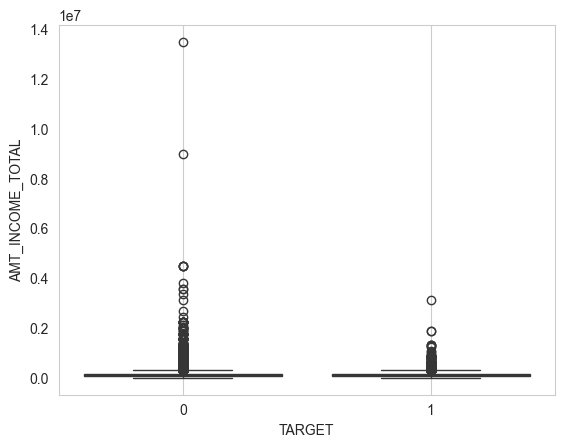

In [ ]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL',
            data=application_train, palette=palette)
plt.grid()
plt.show()

Both clients who have payment difficulties as well as clients who have no payment difficulties, have mostly the same value. However, **as the client's income increases, the probability that cliets will not have difficulty repaying the loan also increases.**

**Age Vs target**

In [ ]:
age_0 = application_train[application_train['TARGET']==0]['DAYS_BIRTH'].values/-365
age_1 = application_train[application_train['TARGET']==1]['DAYS_BIRTH'].values/-365

----------------------------------------------------------------------------------------------------


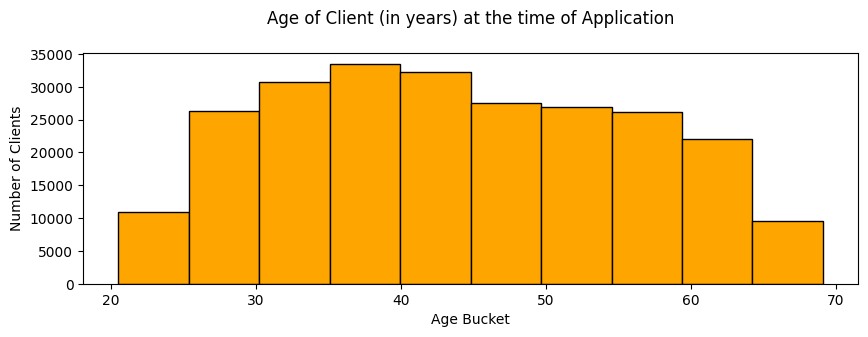

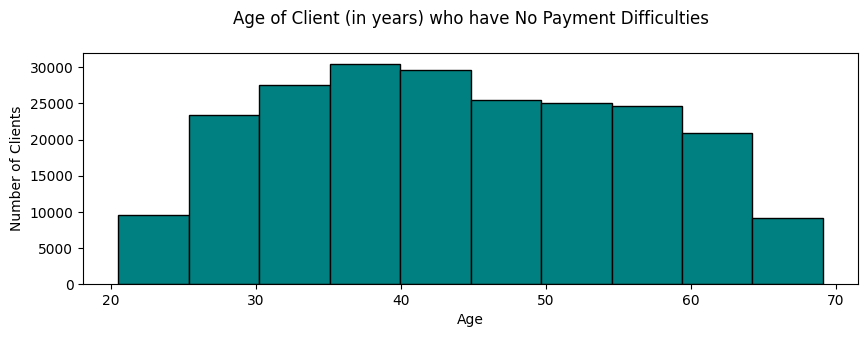

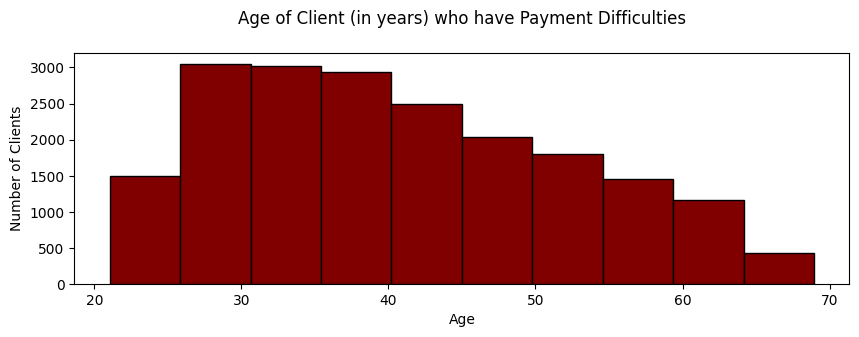

In [ ]:
print('-'*100)

plt.figure(figsize=(10, 3))
plt.hist(application_train['DAYS_BIRTH'].values/-365, bins=10,
         edgecolor='black', color='orange')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10, 3))
plt.hist(age_0, bins=10, edgecolor='black', color='teal')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10, 3))
plt.hist(age_1, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

Most number of clients who apply for loans are in the range of 35-40 years, followed by clients in the range of 40-45 years. Meanwhile, the number of applicants for clients aged <25 or age >65 is very low.

Clients who have no payment difficulties are client the range of 35-45 years. 

**Clients who have payment difficulties are client the range of 25-35 years.**

**EXT Sources vs Target**

There are three EXT_SOURCES columns, which contain values between 0 and 1. They are normalized scores from different sources

----------------------------------------------------------------------------------------------------


d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


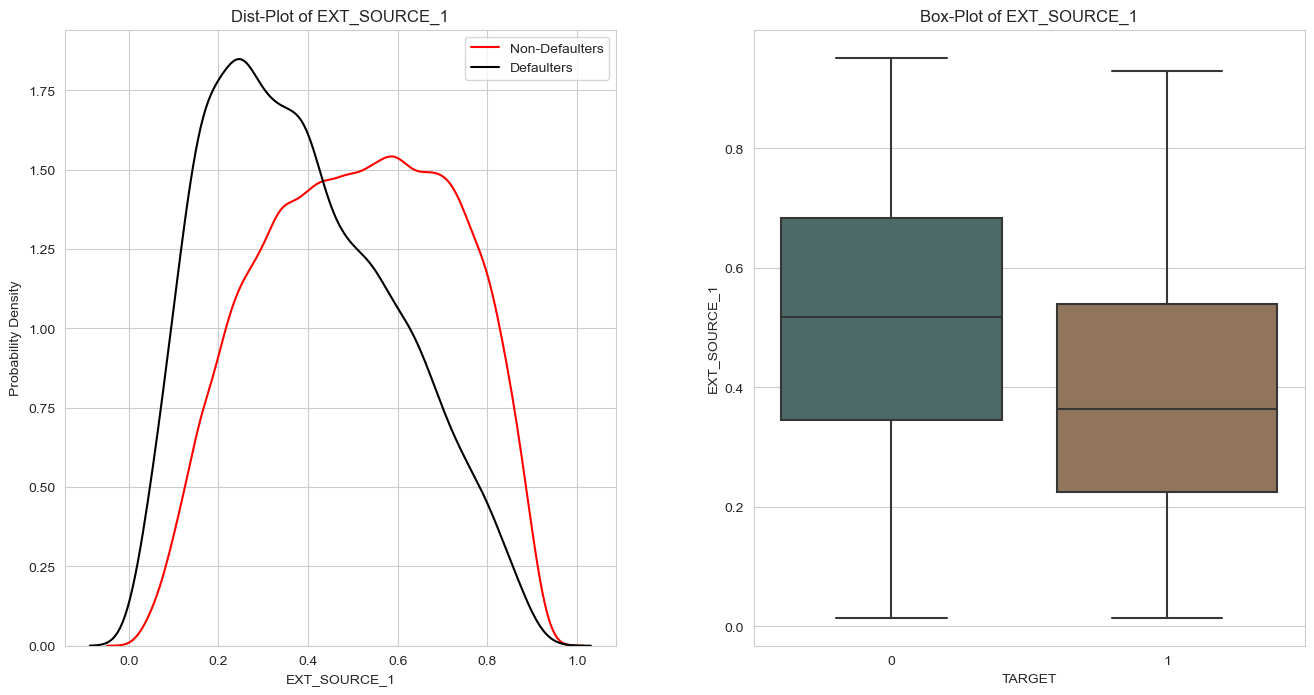

----------------------------------------------------------------------------------------------------


d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


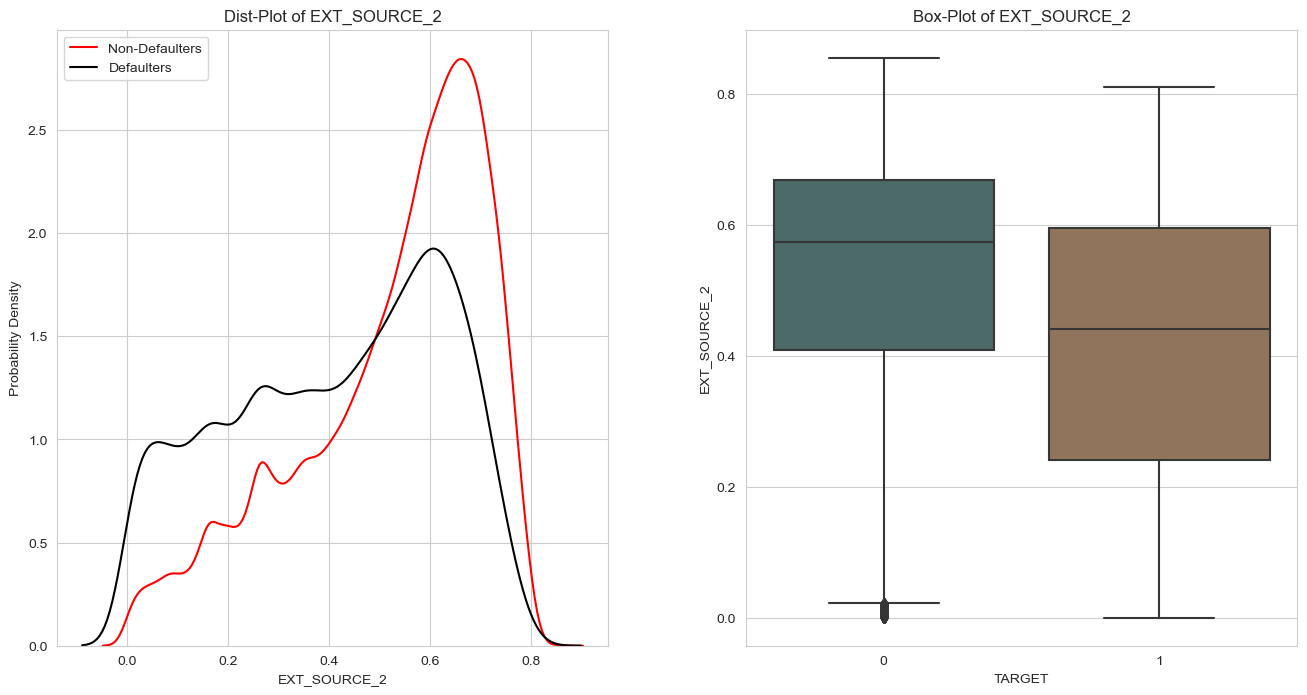

----------------------------------------------------------------------------------------------------


d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


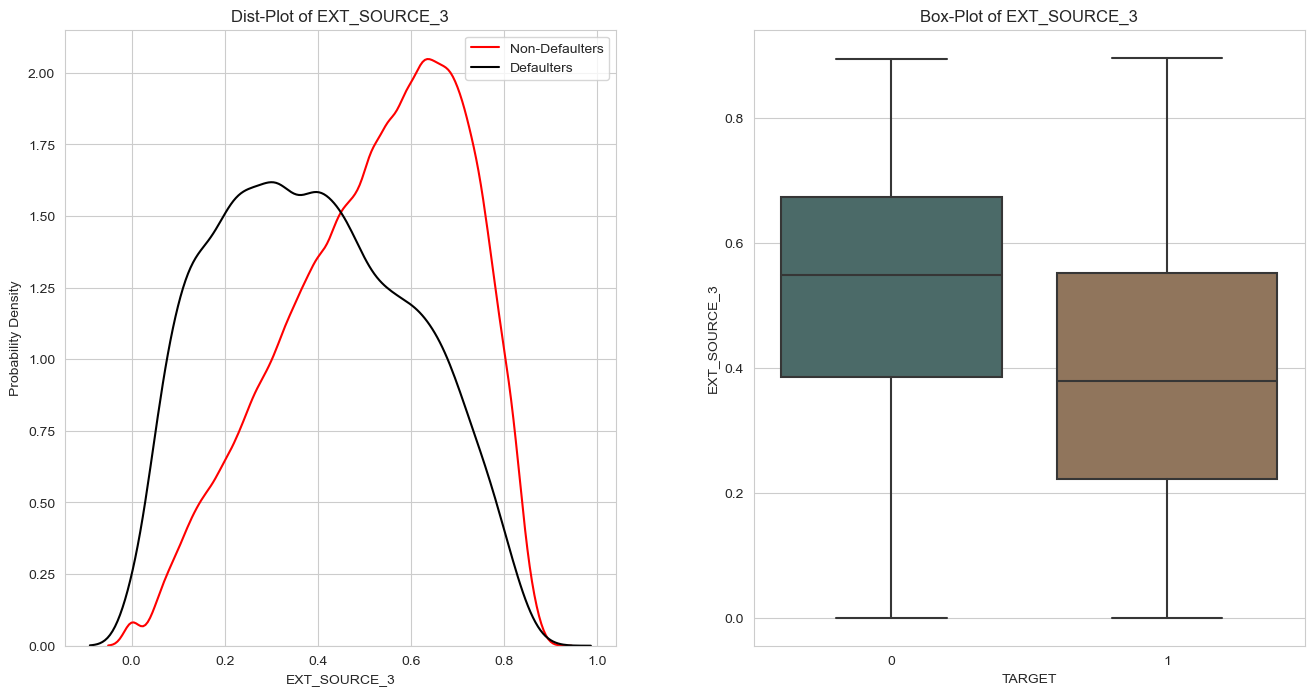

----------------------------------------------------------------------------------------------------


In [ ]:
from utils import plot_continuous_variables
print('-'*100)
plot_continuous_variables(application_train, 'EXT_SOURCE_1', plots=[
                          'distplot', 'box'], figsize=(16, 8))
print('-'*100)
plot_continuous_variables(application_train, 'EXT_SOURCE_2', plots=[
                          'distplot', 'box'], figsize=(16, 8))
print('-'*100)
plot_continuous_variables(application_train, 'EXT_SOURCE_3', plots=[
                          'distplot', 'box'], figsize=(16, 8))
print('-'*100)

All three EXT_SOURCE columns share a similar  trend, which is that the Defaulters tend to have considerably lower values.
    <li>This trend can also be seen with the PDFs. The Non-Defaulters show a higher peak at high EXT_SOURCE values, and the Probability Densities are very low for low values. This implies that Non-Defaulters generally have high values of these scores.
    <li>It is interesting to note that the median value for defaulters is almost equal to or lower than 25th percentile values of Non-Defaulters.</li>
    <li>EXT_SOURCE_1 and EXT_SOURCE_3 columns tend to show better discrimination/separability as compared to EXT_SOURCE_2.
    **<li>These 3 features look to be best separating the Defaulters and Non-Defaulters linearly among all the features so far.**